In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/Desktop/julia_codes/GaussianExpansionCavityMethod.jl/examples/Phi4`


In [2]:
using JLD2, LaTeXStrings, Interpolations
import PyPlot as plt
using PyCall

In [3]:
λc(D,u,K,J) = K*J-3*D*u/((K-1)*J)

λc (generic function with 1 method)

In [4]:
# Graph parameters
NV = 200

# Simulation parameters
dt = 1e-3
x_init = ones(NV)
t_init = 0.0
t_end = 1000.0
naverage = 50

# Mesh parameters
nmesh = 50
D_init = 1e-3
D_end = 1.0

# System parameters
J = 1.0
u = 0.01

0.01

In [5]:
Dss = Vector{Float64}[]
λss = Vector{Float64}[]
x_st_meshs = Matrix{Float64}[]

for K in [3,10]
    dirpath = "data/simPhi4_NV-$(NV)_K-$(K)_J-$(J)_u-$(u)"
    @load dirpath*"_nmesh-$(nmesh)_dt-$(dt)_tend-$(t_end)_Dinit-$(D_init)_Dend-$(D_end).jld2" x_st_mesh Ds λs
    push!(Dss, Ds)
    push!(λss, λs)
    push!(x_st_meshs, x_st_mesh)
end

extrema_x_st = (minimum(minimum.(x_st_meshs)), maximum(maximum.(x_st_meshs)))

(3.04586386734527e-20, 2.25637440759853)

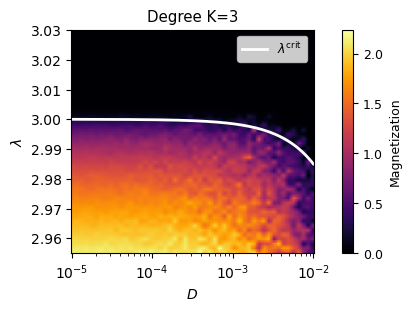

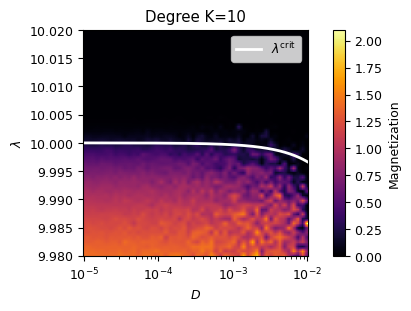

In [6]:
# Create the plots

# K = 3
fig1, ax1 = plt.subplots(1, 1, figsize=(4, 3), layout="constrained") #(15,5) (6.7, 3)
rcParams = PyDict(plt.matplotlib["rcParams"])
rcParams["font.size"] = 9 #9 #18

K = 3
Ki = 1
λs = λss[Ki]
Ds = Dss[Ki]
x_st_mesh = x_st_meshs[Ki]
itp = linear_interpolation((λs, Ds), x_st_mesh)
# Fine grid
Dsf = 10 .^ range(log10.(Ds[1]), stop=log10.(Ds[end]), length=300)
λsf = range(λs[1], stop=λs[end], length=300)
# Interpolate
x_st_meshf = [itp(λ,D) for λ in λsf, D in Dsf]

# Plot using pcolormesh with log10(Ds) and ls
pcm1 = ax1.pcolormesh(Dsf*u, λsf, x_st_meshf; rasterized=true,vmin=minimum(x_st_meshf), vmax=maximum(x_st_meshf), cmap="inferno", shading="auto")
ax1.set_xscale("log")
line1 = ax1.plot(Dsf*u, λc.(Dsf,u,K,J), label=L"\lambda^{\rm crit}", c="white", linewidth=2)
ax1.set_title("Degree K=$K")

fig1.colorbar(pcm1, ax=ax1, label="Magnetization")
ax1.set_xlabel(L"D")
ax1.set_ylabel(L"\lambda")
ax1.legend(loc="upper right")

plt.display(fig1)

fig1.savefig("Phi4_phase_transition_K-$K.pdf", format="pdf", bbox_inches="tight")


# K = 10
fig2, ax2 = plt.subplots(1, 1, figsize=(4, 3), layout="constrained") #(15,5) (6.7, 3)
rcParams = PyDict(plt.matplotlib["rcParams"])
rcParams["font.size"] = 9 #9 #18

K = 10
Ki = 2
λs = λss[Ki]
Ds = Dss[Ki]
x_st_mesh = x_st_meshs[Ki]
itp = linear_interpolation((λs, Ds), x_st_mesh)
# Fine grid
Dsf = 10 .^ range(log10.(Ds[1]), stop=log10.(Ds[end]), length=300)
λsf = range(λs[1], stop=λs[end], length=300)
# Interpolate
x_st_meshf = [itp(λ,D) for λ in λsf, D in Dsf]

# Plot using pcolormesh with log10(Ds) and ls
pcm2 = ax2.pcolormesh(Dsf*u, λsf, x_st_meshf; rasterized=true, vmin=minimum(x_st_meshf), vmax=maximum(x_st_meshf), cmap="inferno", shading="auto")
ax2.set_xscale("log")
line2 = ax2.plot(Dsf*u,λc.(Dsf,u,K,J),label=L"\lambda^{\rm crit}", c="white", linewidth=2)
ax2.set_title("Degree K=$K")


fig2.colorbar(pcm2, ax=ax2, label="Magnetization")
ax2.set_xlabel(L"D")
ax2.set_ylabel(L"\lambda")
ax2.legend(loc="upper right")

plt.display(fig2)

fig2.savefig("Phi4_phase_transition_K-$K.pdf", format="pdf", bbox_inches="tight")

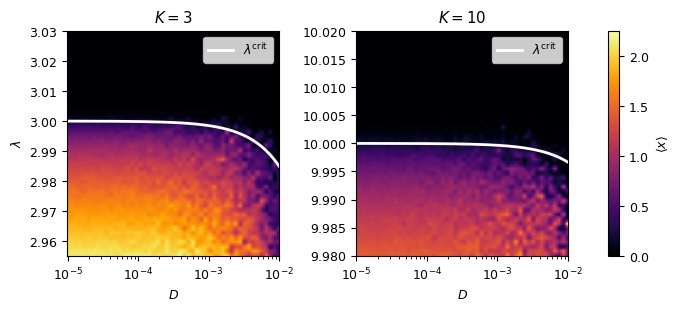

In [7]:
# Create the plot

fig, axs = plt.subplots(1, 2, figsize=(6.7, 3), layout="constrained") #(15,5) (6.7, 3)
rcParams = PyDict(plt.matplotlib["rcParams"])
rcParams["font.size"] = 9 #9 #18

# K = 3
K = 3
Ki = 1
λs = λss[Ki]
Ds = Dss[Ki]
x_st_mesh = x_st_meshs[Ki]
itp = linear_interpolation((λs, Ds), x_st_mesh)
# Fine grid
Dsf = 10 .^ range(log10.(Ds[1]), stop=log10.(Ds[end]), length=300)
λsf = range(λs[1], stop=λs[end], length=300)
# Interpolate
x_st_meshf = [itp(λ,D) for λ in λsf, D in Dsf]

# Plot using pcolormesh with log10(Ds) and ls
pcm = axs[Ki].pcolormesh(Dsf*u, λsf, x_st_meshf; vmin=extrema_x_st[1], vmax=extrema_x_st[2], rasterized=true, cmap="inferno", shading="auto")
axs[Ki].set_xscale("log")
line = axs[Ki].plot(Dsf*u,λc.(Dsf,u,K,J), label=L"\lambda^{\rm crit}", c="white", linewidth=2)
axs[Ki].set_title(L"K="*"$K")
axs[Ki].legend(loc="upper right")

# K = 10
K = 10
Ki = 2
λs = λss[Ki]
Ds = Dss[Ki]
x_st_mesh = x_st_meshs[Ki]
itp = linear_interpolation((λs, Ds), x_st_mesh)
# Fine grid
Dsf = 10 .^ range(log10.(Ds[1]), stop=log10.(Ds[end]), length=300)
λsf = range(λs[1], stop=λs[end], length=300)
# Interpolate
x_st_meshf = [itp(λ,D) for λ in λsf, D in Dsf]

# Plot using pcolormesh with log10(Ds) and ls
pcm = axs[Ki].pcolormesh(Dsf*u, λsf, x_st_meshf; vmin=extrema_x_st[1], vmax=extrema_x_st[2], rasterized=true, cmap="inferno", shading="auto")
axs[Ki].set_xscale("log")
line = axs[Ki].plot(Dsf*u,λc.(Dsf,u,K,J), label=L"\lambda^{\rm crit}", c="white", linewidth=2)
axs[Ki].set_title(L"K="*"$K")
axs[Ki].legend(loc="upper right")


fig.colorbar(pcm, ax=axs, label=L"\langle x \rangle")
axs[1].set_xlabel(L"D")
axs[1].set_ylabel(L"\lambda")
axs[2].set_xlabel(L"D")

plt.display(fig)

fig.savefig("Phi4_phase_transition.pdf", format="pdf")